# The Sparks Foundation
## Data Science and Business Analytics

# TASK-4 Exploratory Data Analysis - Terrorism
## Author - Pyush Kumar Gupta

## Importing all required libraries and dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use(["seaborn-bright","dark_background"])

In [8]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='cp1252')
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
data.shape

(181691, 135)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [11]:
for i in data.columns:
    per = data[i].isnull().sum()
    print("Column {} has {}% data missing".format(i,round((per/len(data))*100,3)))

Column eventid has 0.0% data missing
Column iyear has 0.0% data missing
Column imonth has 0.0% data missing
Column iday has 0.0% data missing
Column approxdate has 94.915% data missing
Column extended has 0.0% data missing
Column resolution has 98.778% data missing
Column country has 0.0% data missing
Column country_txt has 0.0% data missing
Column region has 0.0% data missing
Column region_txt has 0.0% data missing
Column provstate has 0.232% data missing
Column city has 0.239% data missing
Column latitude has 2.508% data missing
Column longitude has 2.508% data missing
Column specificity has 0.003% data missing
Column vicinity has 0.0% data missing
Column location has 69.456% data missing
Column summary has 36.396% data missing
Column crit1 has 0.0% data missing
Column crit2 has 0.0% data missing
Column crit3 has 0.0% data missing
Column doubtterr has 0.001% data missing
Column alternative has 84.033% data missing
Column alternative_txt has 84.033% data missing
Column multiple has 0.

In [12]:
for i in data.columns:
    per = data[i].isnull().sum()
    percentage = round((per/len(data))*100,3)
    if percentage>=30:
        data.drop(columns=[i],inplace=True)
        print("Column {} with {}% data missing is dropped".format(i,percentage))

Column approxdate with 94.915% data missing is dropped
Column resolution with 98.778% data missing is dropped
Column location with 69.456% data missing is dropped
Column summary with 36.396% data missing is dropped
Column alternative with 84.033% data missing is dropped
Column alternative_txt with 84.033% data missing is dropped
Column attacktype2 with 96.525% data missing is dropped
Column attacktype2_txt with 96.525% data missing is dropped
Column attacktype3 with 99.764% data missing is dropped
Column attacktype3_txt with 99.764% data missing is dropped
Column targtype2 with 93.867% data missing is dropped
Column targtype2_txt with 93.867% data missing is dropped
Column targsubtype2 with 94.119% data missing is dropped
Column targsubtype2_txt with 94.119% data missing is dropped
Column corp2 with 94.432% data missing is dropped
Column target2 with 93.935% data missing is dropped
Column natlty2 with 94.04% data missing is dropped
Column natlty2_txt with 94.04% data missing is dropped

In [13]:
data.shape

(181691, 48)

In [14]:
data = data.dropna(axis=0,how="any")
data.shape

(106564, 48)

In [15]:
for i in data.columns:
    print("Column {} has {} unique values".format(i,data[i].nunique()))

Column eventid has 106564 unique values
Column iyear has 47 unique values
Column imonth has 12 unique values
Column iday has 32 unique values
Column extended has 2 unique values
Column country has 195 unique values
Column country_txt has 195 unique values
Column region has 12 unique values
Column region_txt has 12 unique values
Column provstate has 2396 unique values
Column city has 25350 unique values
Column latitude has 34912 unique values
Column longitude has 34665 unique values
Column specificity has 4 unique values
Column vicinity has 3 unique values
Column crit1 has 2 unique values
Column crit2 has 2 unique values
Column crit3 has 2 unique values
Column doubtterr has 3 unique values
Column multiple has 2 unique values
Column success has 2 unique values
Column suicide has 2 unique values
Column attacktype1 has 9 unique values
Column attacktype1_txt has 9 unique values
Column targtype1 has 21 unique values
Column targtype1_txt has 21 unique values
Column targsubtype1 has 112 unique

## Number of Crimes per Year.

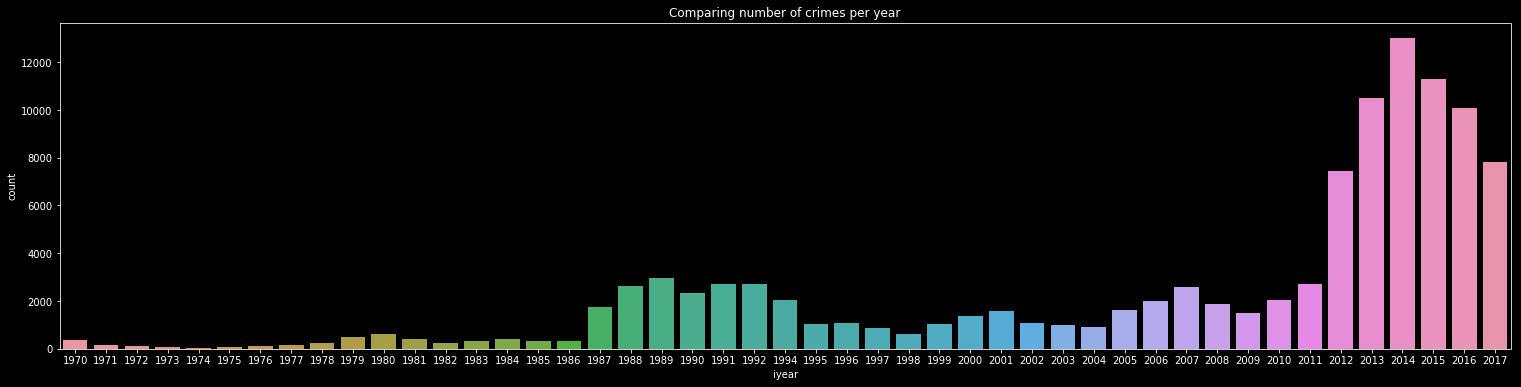

In [16]:
plt.figure(figsize=(26,6))
sns.countplot(data["iyear"])
plt.title("Comparing number of crimes per year")
plt.show()

## Number of Crimes per Month.

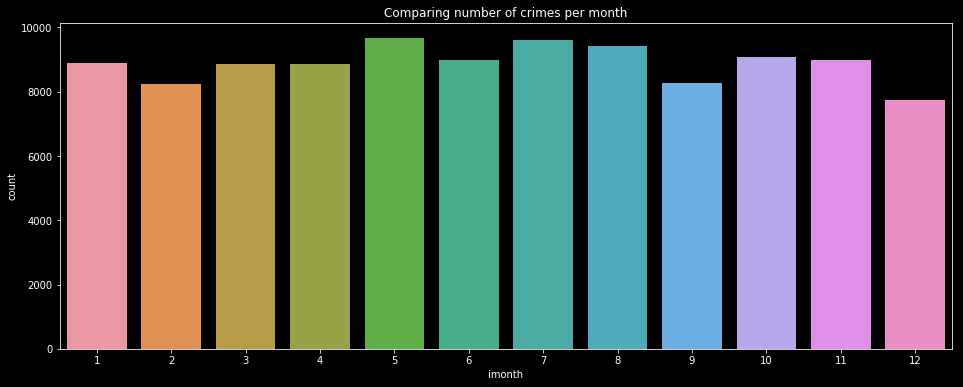

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(data["imonth"])
plt.title("Comparing number of crimes per month")
plt.show()

## Number of Crimes per Day.

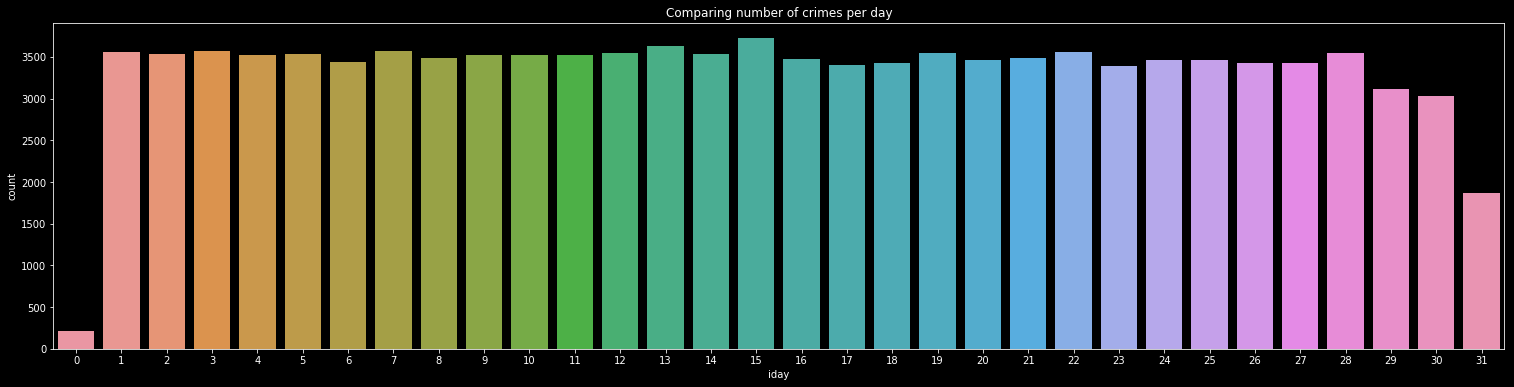

In [18]:
plt.figure(figsize=(26,6))
sns.countplot(data["iday"])
plt.title("Comparing number of crimes per day")
plt.show()

### Pie chart for categorical data.

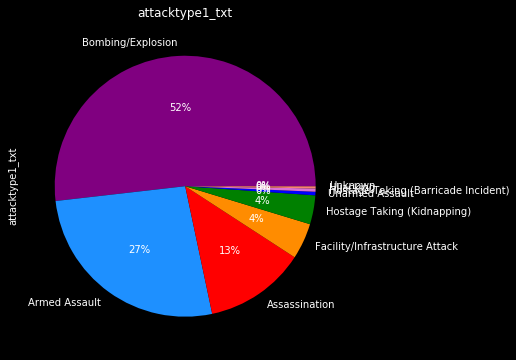

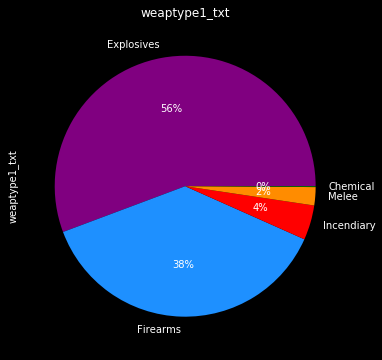

In [19]:
for i in data.columns:
    if data[i].nunique()<=10 and data[i].dtype=="object":
        data[i].value_counts().plot(kind = "pie",title=i,colors = ["purple","dodgerblue","r","darkorange","g","b","orchid","salmon","navy","silver"],
                                    autopct='%1.0f%%',figsize=(6,6))
        plt.show()

### Barplot for numerical data.

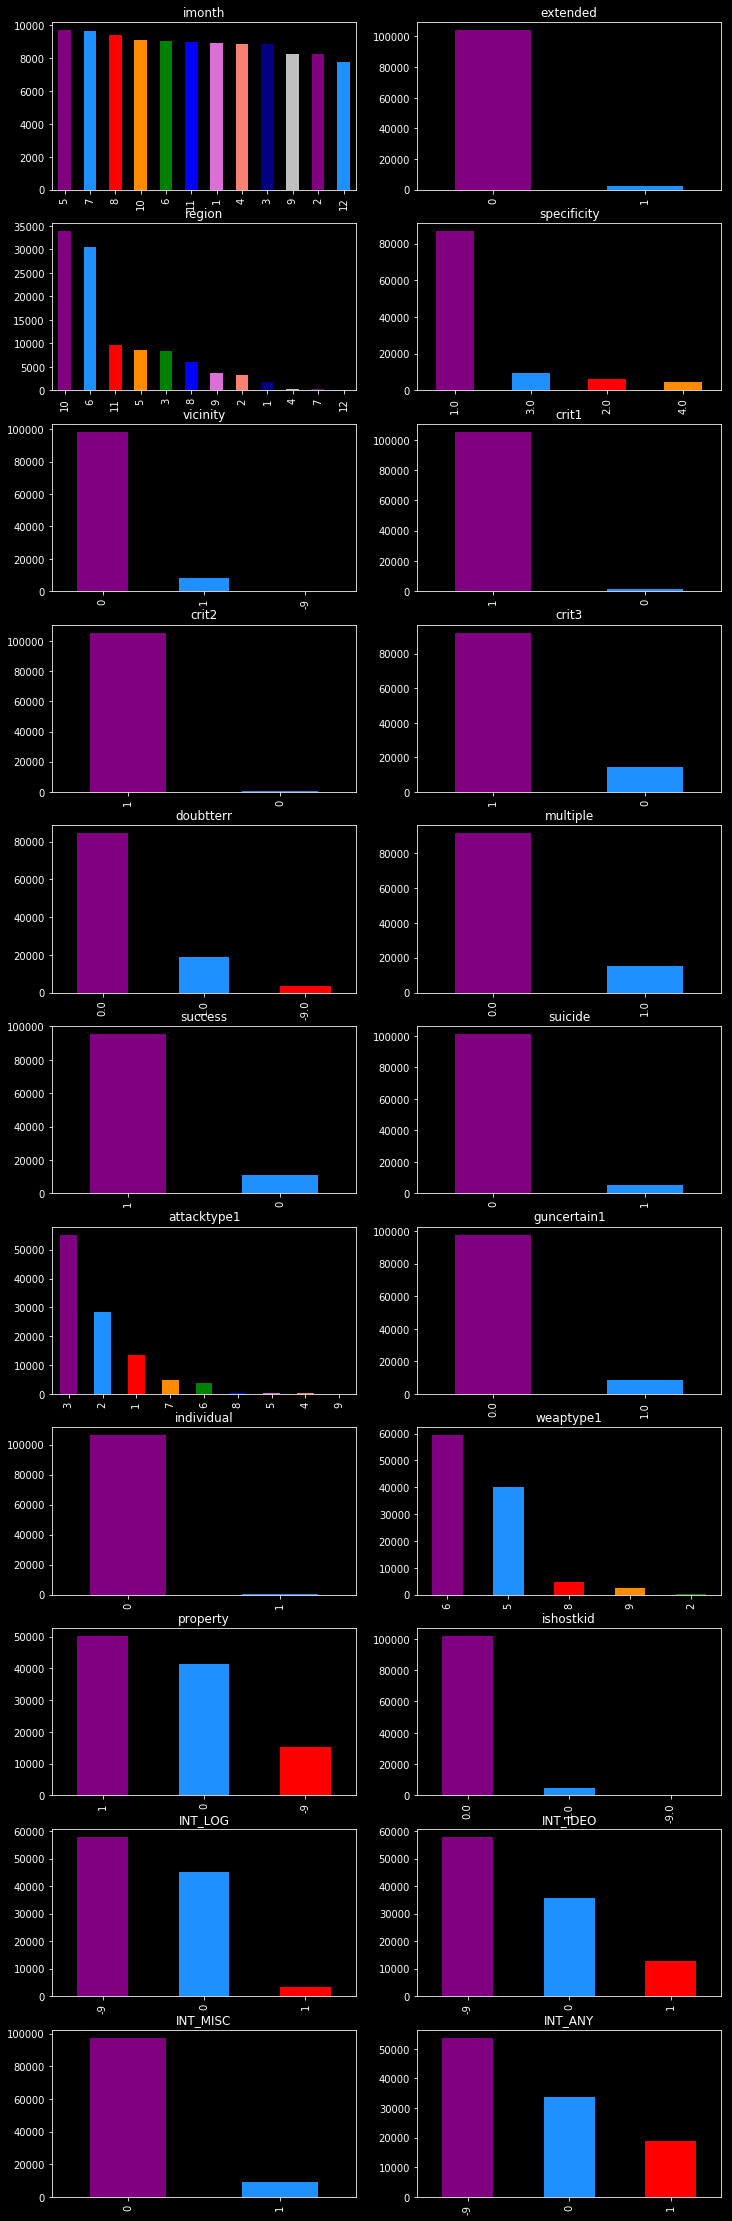

In [20]:
x = 0
c = 1
plt.figure(figsize=(12,40))

for i in data.columns:
    if data[i].nunique()<=20 and data[i].dtype!="object":
        plt.subplot(11,2,c)
        data[i].value_counts().plot(kind = "bar",title=i,color = ["purple","dodgerblue","r","darkorange","g","b","orchid","salmon","navy","silver"])
        x = x+1
        c = c+1

### Histogram for numerical data.

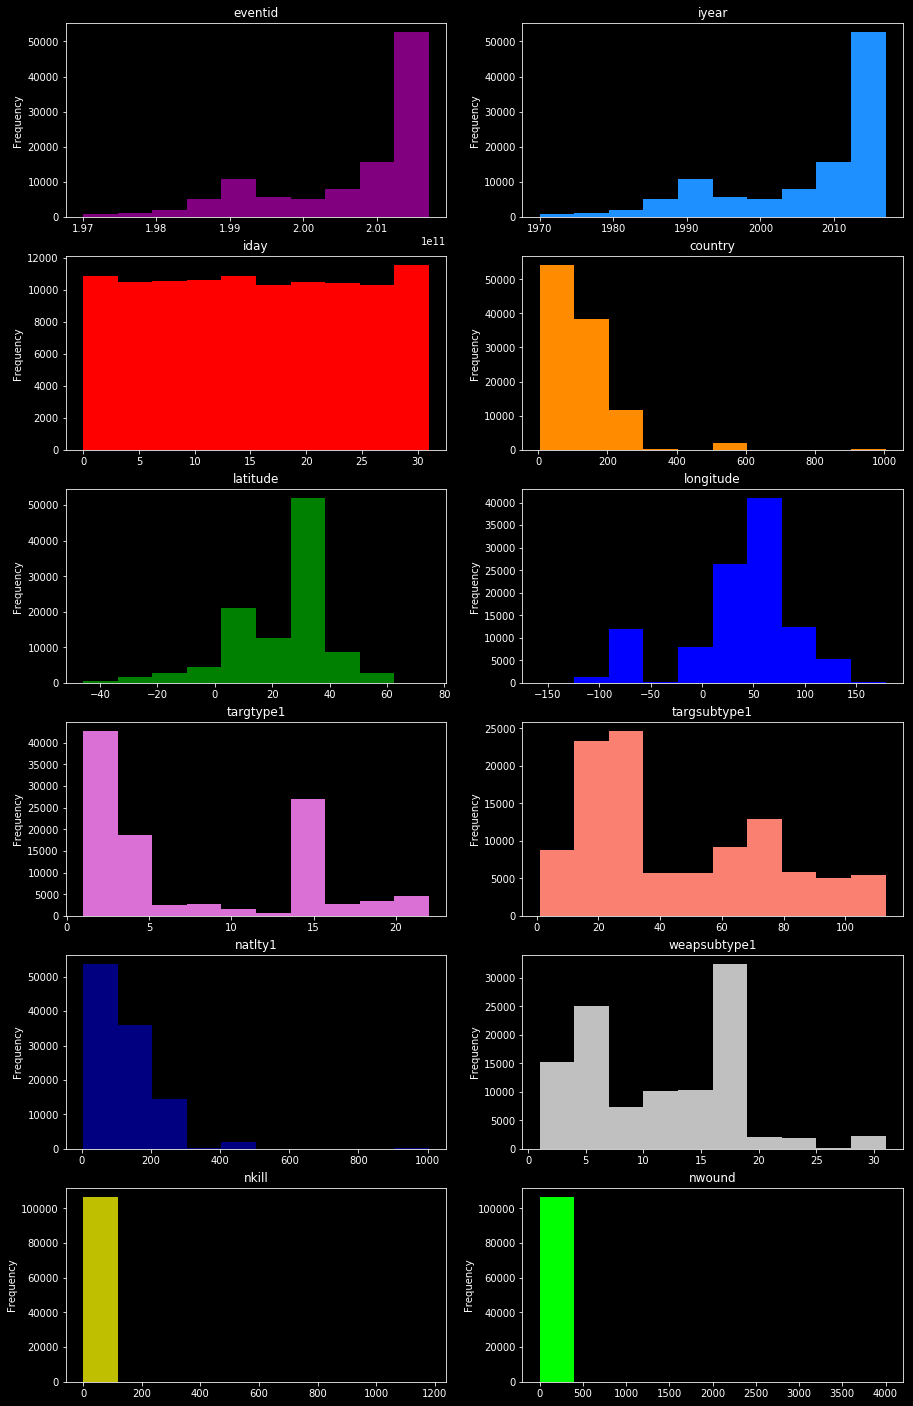

In [21]:
colours = ["purple","dodgerblue","r","darkorange","g","b","orchid","salmon","navy","silver","y","lime"]
x = 0
c = 1
plt.figure(figsize=(15,25))
for i in data.columns:
    if data[i].nunique()>20 and data[i].dtype!="object":
        plt.subplot(6,2,c)
        data[i].plot(kind = "hist",title=i,color = colours[x%12])
        x = x+1
        c = c+1

In [22]:
explosion = data[data["attacktype1_txt"]=="Bombing/Explosion"]
firearms = data[data["weaptype1_txt"]=="Firearms"]
hijack = data[data["attacktype1_txt"]=="Hijacking"]
kidnap = data[data["attacktype1_txt"]=="Hostage Taking (Kidnapping)"]

## Crime through Bomping/Explosion in Countries.

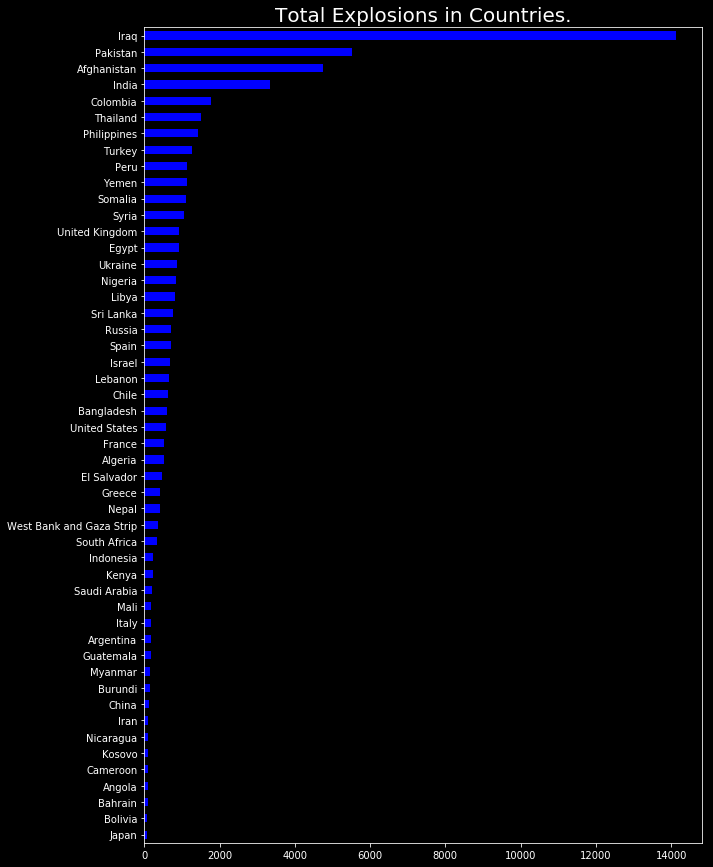

In [23]:
plt.figure(figsize=(10,15))
explosion["country_txt"].value_counts().sort_values().tail(50).plot(kind = "barh",color="blue")
plt.title("Total Explosions in Countries.",fontsize=20)
plt.show()

## Cirme with Firearms in Countries.

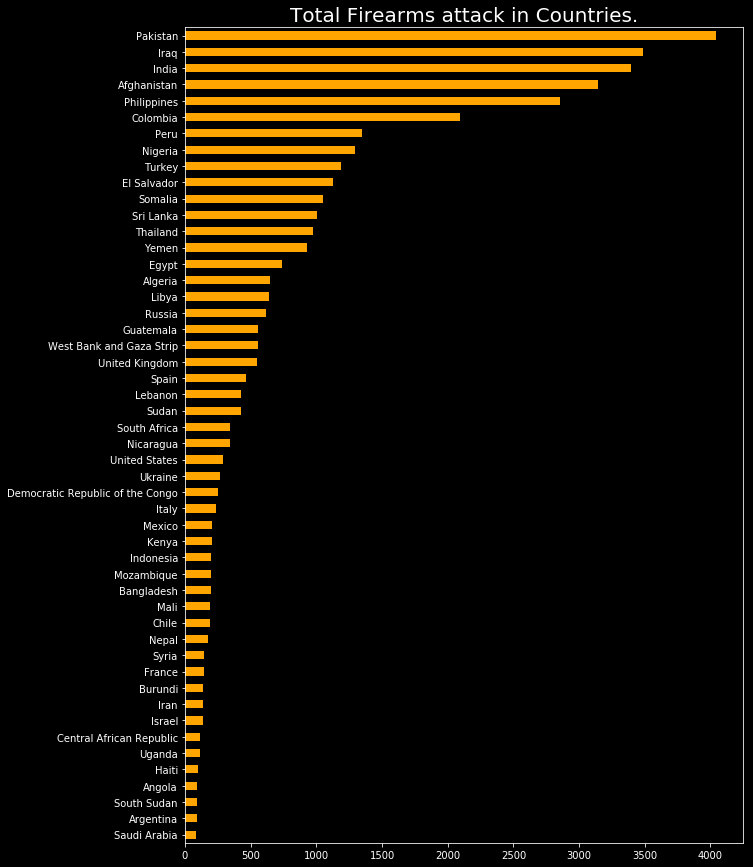

In [24]:
plt.figure(figsize=(10,15))
firearms["country_txt"].value_counts().sort_values().tail(50).plot(kind = "barh",color="orange")
plt.title("Total Firearms attack in Countries.",fontsize=20)
plt.show()

## Total Hijacking in Countries.

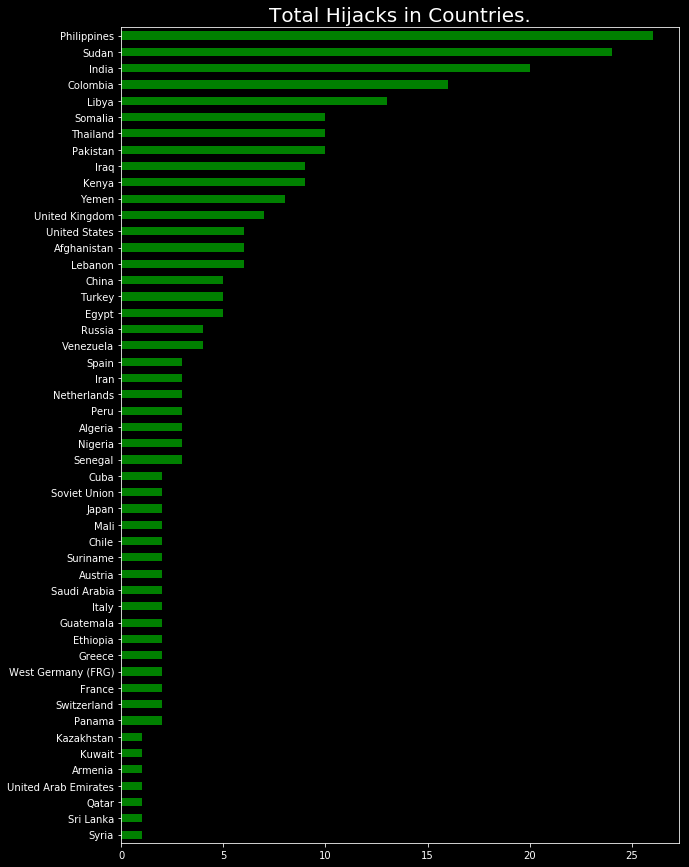

In [25]:
plt.figure(figsize=(10,15))
hijack["country_txt"].value_counts().sort_values().tail(50).plot(kind = "barh",color="g")
plt.title("Total Hijacks in Countries.",fontsize=20)
plt.show()

## Total Kidnapping in Countries.

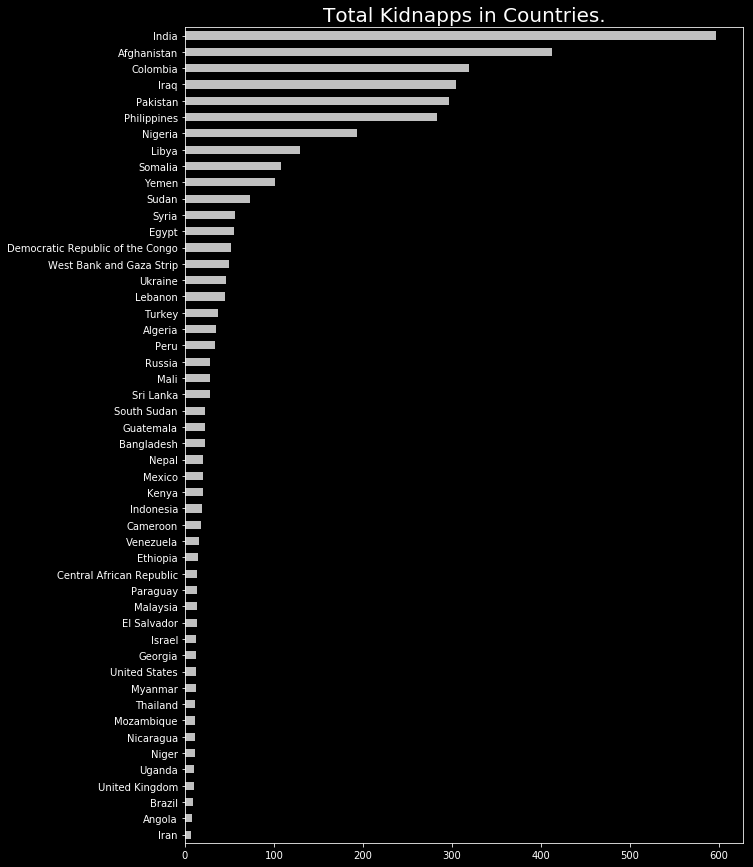

In [26]:
plt.figure(figsize=(10,15))
kidnap["country_txt"].value_counts().sort_values().tail(50).plot(kind = "barh",color="silver")
plt.title("Total Kidnapps in Countries.",fontsize=20)
plt.show()

## Total Crimes per Region.

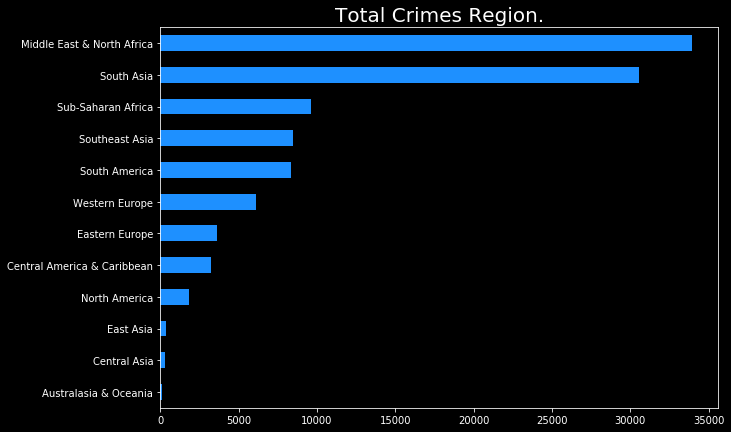

In [27]:
plt.figure(figsize=(10,7))
data["region_txt"].value_counts().sort_values().tail(50).plot(kind = "barh",color="dodgerblue")
plt.title("Total Crimes Region.",fontsize=20)
plt.show()

## Total Crimes Per Country.

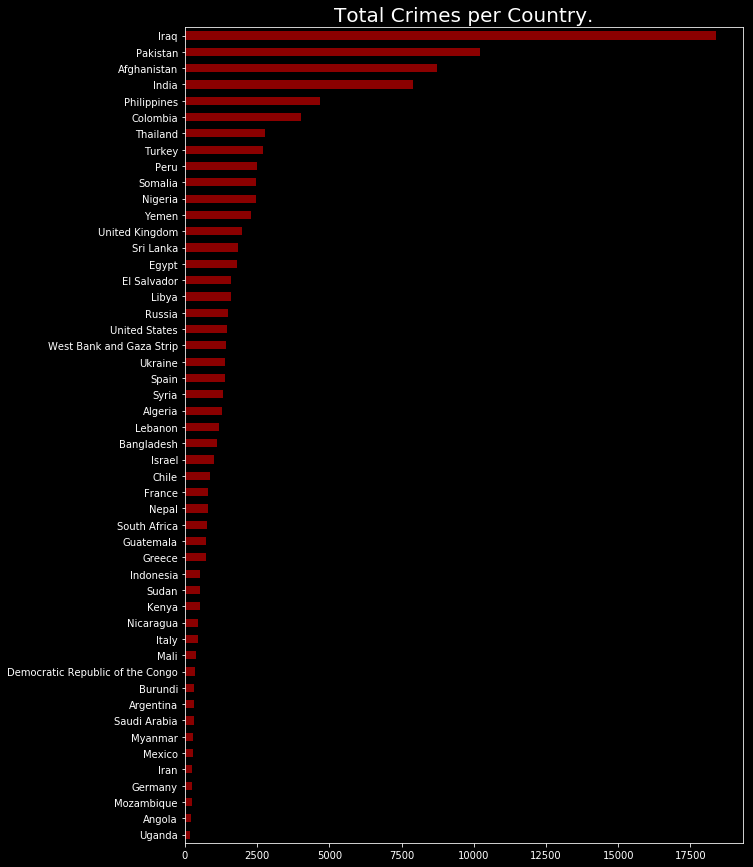

In [28]:
plt.figure(figsize=(10,15))
data["country_txt"].value_counts().sort_values().tail(50).plot(kind = "barh",color="darkred")
plt.title("Total Crimes per Country.",fontsize=20)
plt.show()

In [29]:
top_countries = ["Iraq","Pakistan","Afghanistan","India","Philippines","Colombia"]

#### Taking insights on crime rate of top most 6 countries with most crimes.

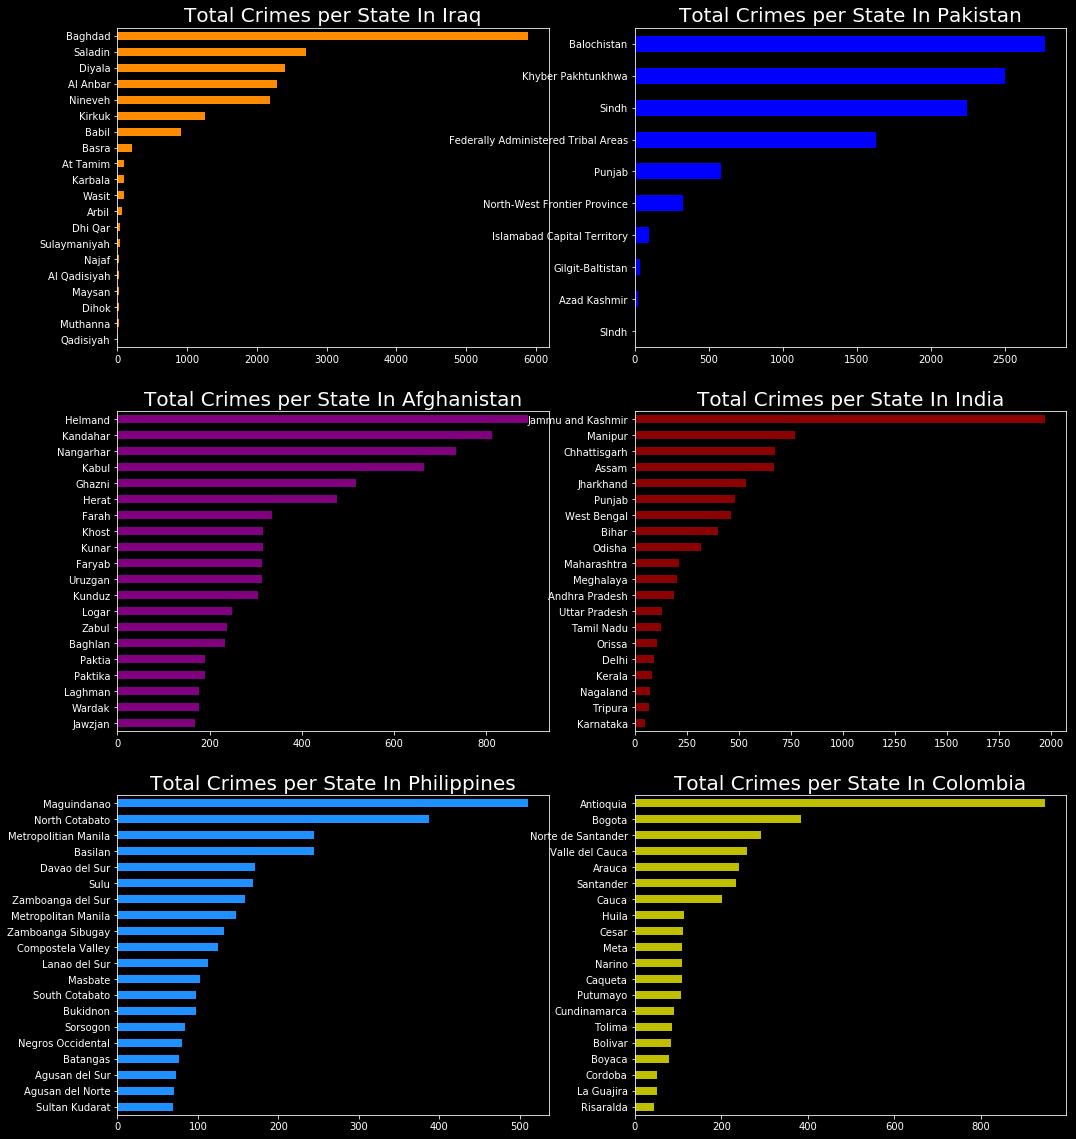

In [30]:
cl = ["darkorange","b","purple","darkred","dodgerblue","y"]
x = 0
c = 1
plt.figure(figsize=(17,20))
for i in top_countries:
    country = data[data["country_txt"]==i]
    plt.subplot(3,2,c)
    country["provstate"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per State In {}".format(i),fontsize=20)
    c = c+1
    x = x+1

#### Now Taking insights on crime rate of top most 3 states with most crimes for all above 6 states.

#### 1) From Iraq Bagdad, Saladin and Diyala has most of crime rate.
#### 2) From Pakistan Balochistan, Khyber Pakhtunkhwa and Sindh has most crime rate.
#### 3) From Afghanistan Helmand, Khandahar and Nangarhar has most crime rate.
#### 4) Form India Jammu and Kashmir, Manipur and Chhattisgarh has most crime rate.
#### 5) From Philippines Maguindanao, North Cotabato and Metropolitian Manila has most crime rate.
#### 6) From Colombia Antioquia, Bogota and Norte de Santander has most crime rate.

In [31]:
Iraq = ["Baghdad","Saladin","Diyala"]
Pakistan = ["Balochistan","Khyber Pakhtunkhwa","Sindh"]
Afghanistan = ["Helmand","Kandahar","Nangarhar"]
India  = ["Jammu and Kashmir","Manipur","Chhattisgarh"]
Philippines = ["Maguindanao","North Cotabato","Metropolitian Manila"]
Colombia  = ["Antioquia","Bogota","Norte de Santander"]

## Iraq

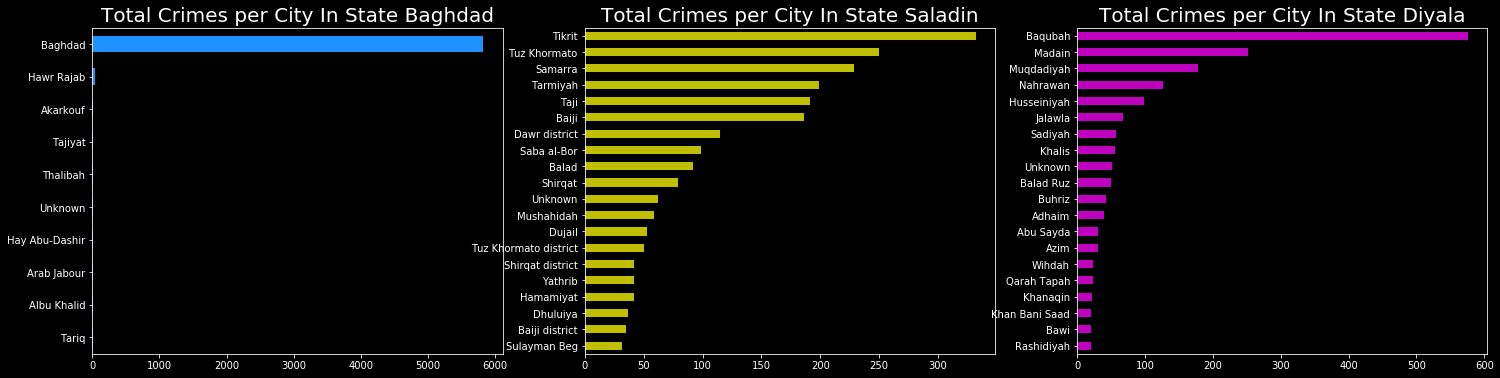

In [32]:
cl = ["dodgerblue","y","m"]
x = 0
c = 1
plt.figure(figsize=(25,6))
for i in Iraq:
    state = data[data["provstate"]==i]
    plt.subplot(1,3,c)
    state["city"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per City In State {}".format(i),fontsize=20)
    c = c+1
    x = x+1

## Pakistan

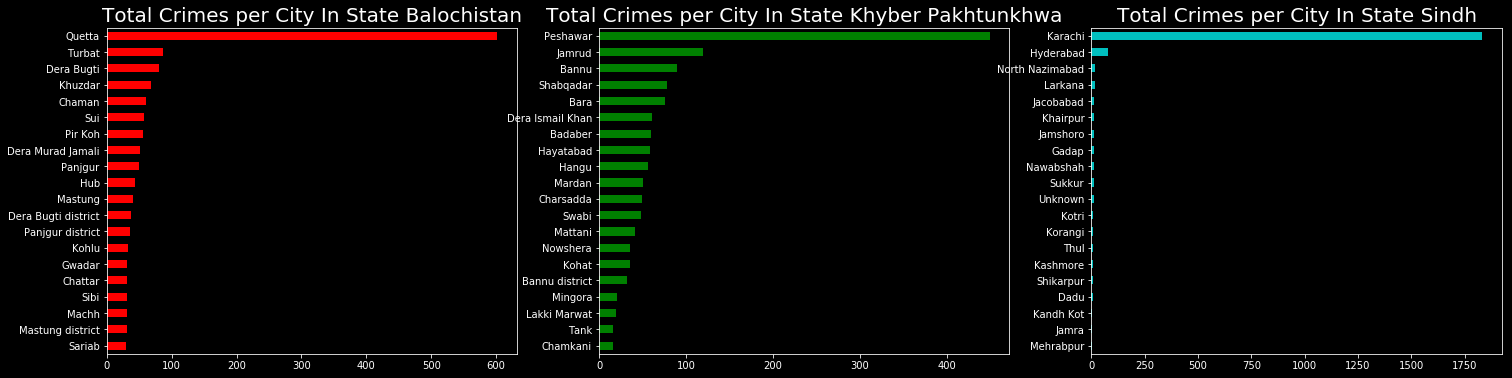

In [33]:
cl = ["r","g","c"]
x = 0
c = 1
plt.figure(figsize=(25,6))
for i in Pakistan:
    state = data[data["provstate"]==i]
    plt.subplot(1,3,c)
    state["city"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per City In State {}".format(i),fontsize=20)
    c = c+1
    x = x+1

## Afghannistan

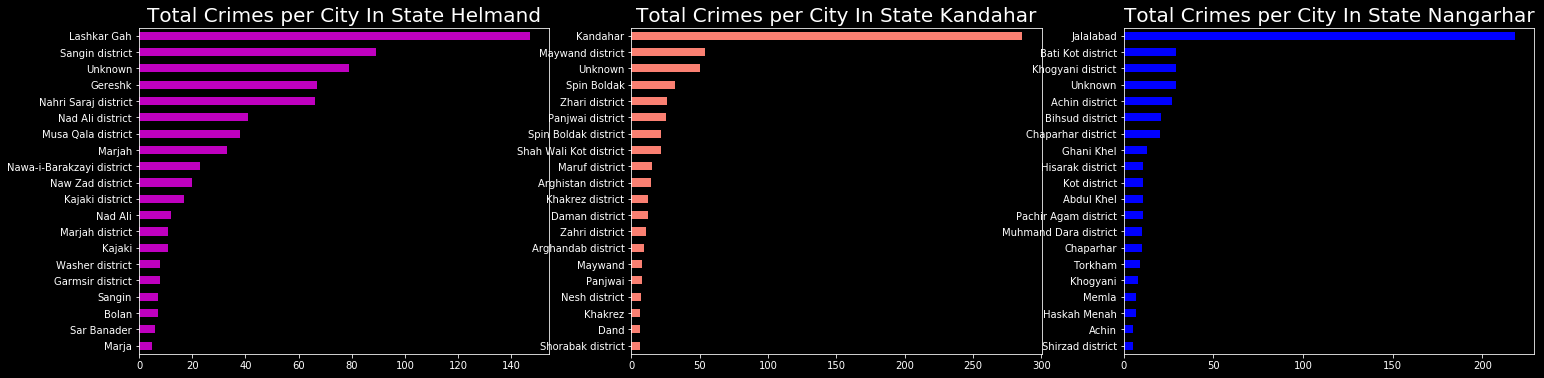

In [34]:
cl = ["m","salmon","b"]
x = 0
c = 1
plt.figure(figsize=(25,6))
for i in Afghanistan:
    state = data[data["provstate"]==i]
    plt.subplot(1,3,c)
    state["city"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per City In State {}".format(i),fontsize=20)
    c = c+1
    x = x+1

## India

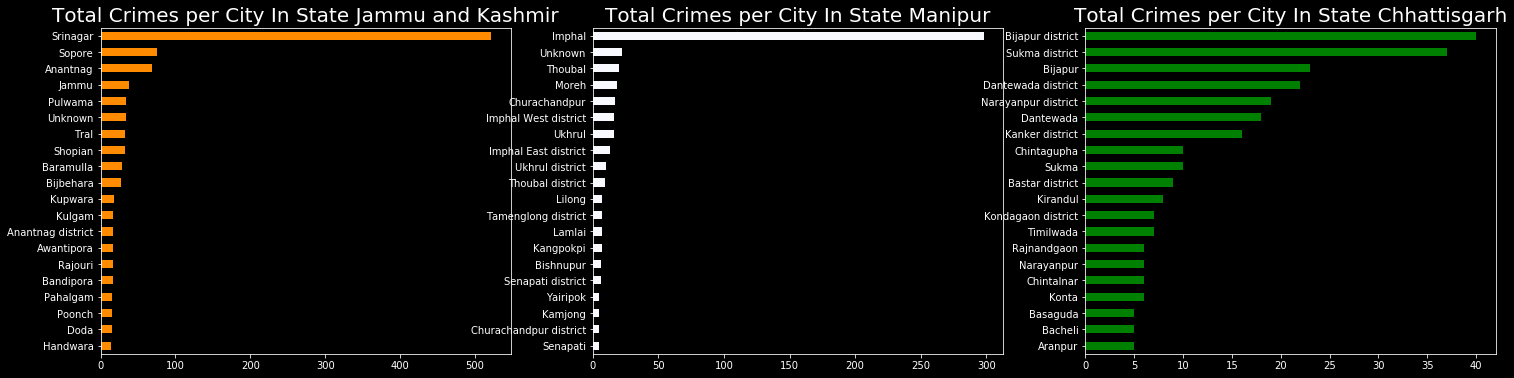

In [35]:
cl = ["darkorange","ghostwhite","g"]
x = 0
c = 1
plt.figure(figsize=(25,6))
for i in India:
    state = data[data["provstate"]==i]
    plt.subplot(1,3,c)
    state["city"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per City In State {}".format(i),fontsize=20)
    c = c+1
    x = x+1

## Philippines

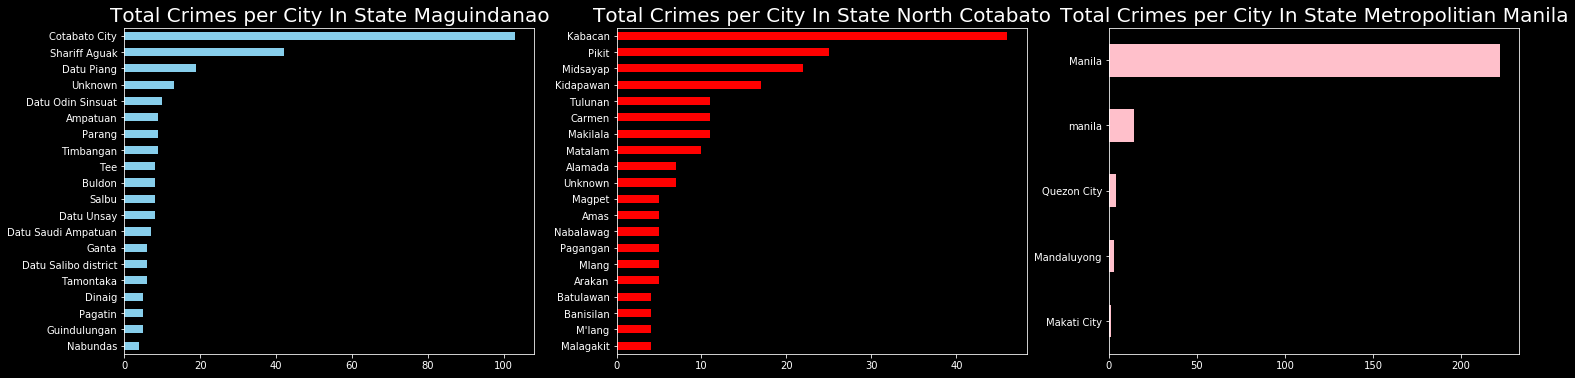

In [36]:
cl = ["skyblue","r","pink"]
x = 0
c = 1
plt.figure(figsize=(25,6))
for i in Philippines:
    state = data[data["provstate"]==i]
    plt.subplot(1,3,c)
    state["city"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per City In State {}".format(i),fontsize=20)
    c = c+1
    x = x+1

## Colombia

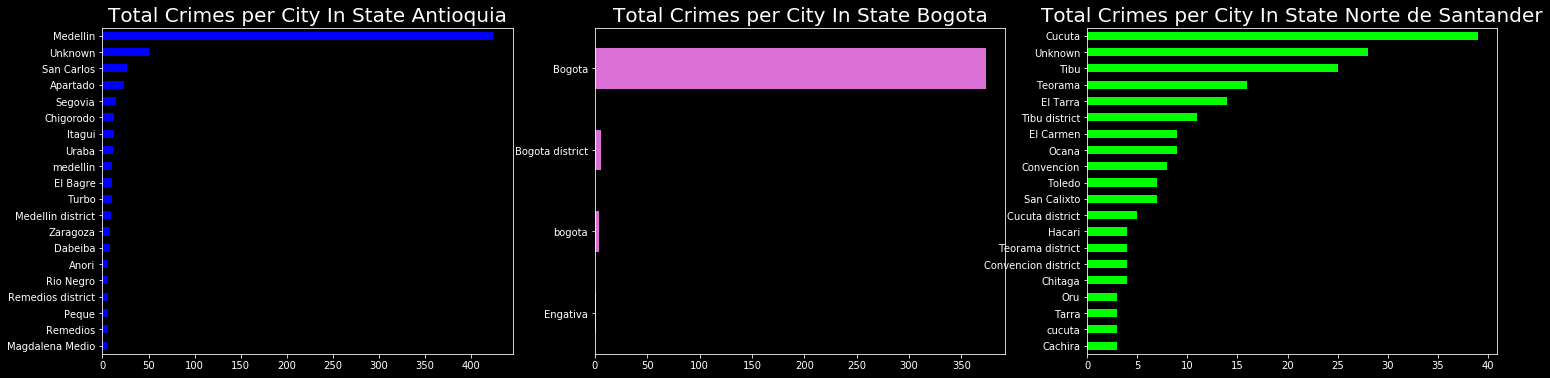

In [38]:
cl = ["b","orchid","lime"]
x = 0
c = 1
plt.figure(figsize=(25,6))
for i in Colombia:
    state = data[data["provstate"]==i]
    plt.subplot(1,3,c)
    state["city"].value_counts().sort_values().tail(20).plot(kind = "barh",color=cl[x%6])
    plt.title("Total Crimes per City In State {}".format(i),fontsize=20)
    c = c+1
    x = x+1

# THANK YOU